In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import time
# from pyspark.sql.types import *
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# from pyspark.sql.types import *
# from pyspark.sql import functions 
from sklearn.preprocessing import LabelEncoder

2024-09-25 01:33:24.972185: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


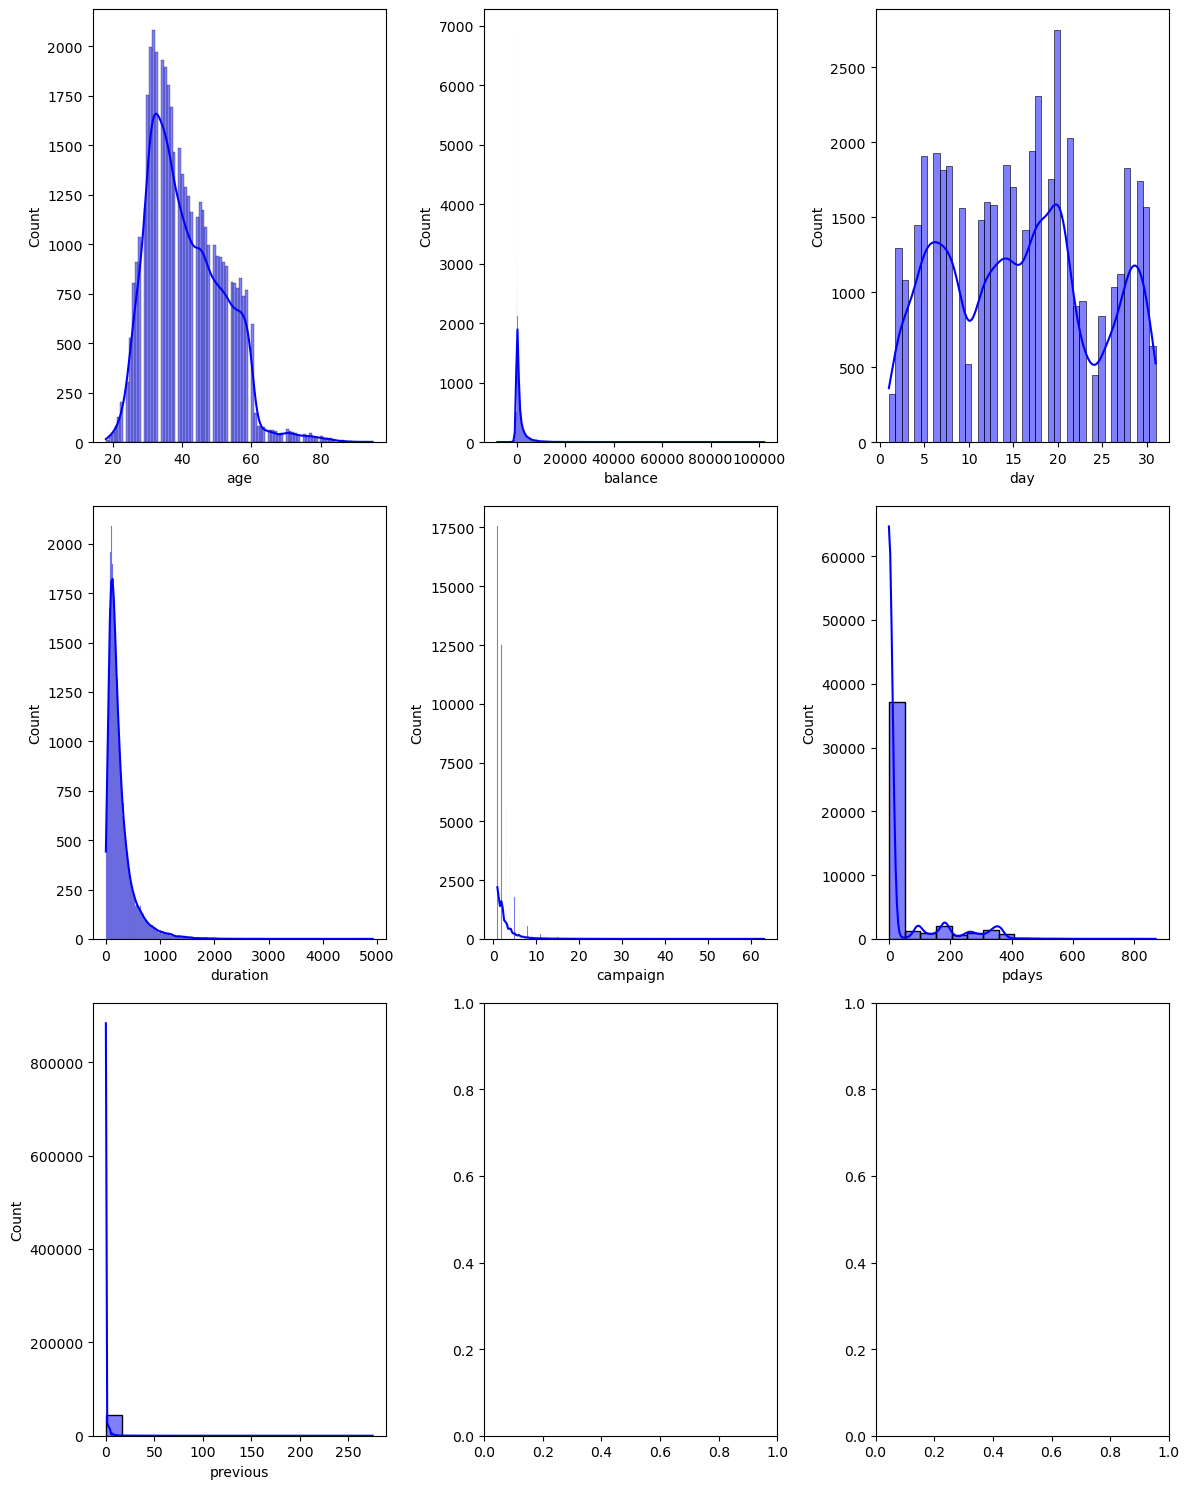

In [6]:
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 3, figsize=(12, 15))

# Plot each histogram on its own subplot
sns.histplot(data=df, x="age", kde=True, label='1', color='b', ax=axes[0, 0])
sns.histplot(data=df, x="balance", kde=True, label='2', color='b', ax=axes[0, 1])
sns.histplot(data=df, x="day", kde=True, label='2', color='b', ax=axes[0, 2])
sns.histplot(data=df, x="duration", kde=True, label='3', color='b', ax=axes[1, 0])
sns.histplot(data=df, x="campaign", kde=True, label='4', color='b', ax=axes[1, 1])
sns.histplot(data=df, x="pdays", kde=True, label='5', color='b', ax=axes[1, 2])
sns.histplot(data=df, x="previous", kde=True, label='6', color='b', ax=axes[2, 0])

# Add legend to each subplot
# for ax_row in axes:
#     for ax in ax_row:
#         ax.legend(loc='upper right')
#         ax.grid(color='lightgrey', linewidth=0.25)

# Adjust layout
plt.tight_layout()

# Show the plot
#plt.savefig('livestock_histograms.png')
plt.show()

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [10]:
lencoder = LabelEncoder()
#Function to encode any dataframe
def encode_label(dataFrame): #Read in dataframe
    encoded_df = dataFrame.copy() #Create a copy of the data frame to encode
    for column in encoded_df.columns: #For loop to iterate through the data frame columns
        if encoded_df[column].dtype == 'object': #Conditionalo statement to select only categorical comlumns
            encoded_df[column] = lencoder.fit_transform(encoded_df[column]) #Applying label encoding instance
    return encoded_df #returning encoded dataframe


In [11]:
df = encode_label(df)

In [12]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [13]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [14]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X = df.iloc[:,0:16]  
X = minmax_scaler.fit_transform(X)
Y = df.iloc[:,16]
Y = Y.values
Y = Y.reshape(-1, 1)
Y = minmax_scaler.fit_transform(Y)
Y.shape

(45211, 1)

In [27]:
df_X = pd.DataFrame(X, columns=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'])
df_Y = pd.DataFrame(Y, columns=['y'])  # Y as a single column

# Concatenate X and Y dataframes
df_new = pd.concat([df_X, df_Y], axis=1)

# Save as CSV
df_new.to_csv('Bank-Pyspark1.csv', index=False)

In [28]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.000000,0.000000,0.000000,1.000000,0.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.000000,0.000000,0.000000,1.000000,0.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.000000,0.000000,0.000000,1.000000,0.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.000000,0.000000,0.000000,1.000000,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.000000,0.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,0.000000,1.000000,1.0
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,0.000000,1.000000,1.0
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.212156,0.010909,0.666667,1.0
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.103294,0.048387,0.000000,0.000000,1.000000,0.0
